In [102]:
import sys
sys.path.insert(0, '../python')
from bifDiag import bifDiag
from matplotlib import pyplot as plt

from numpy import meshgrid, array, identity, ones, diag, zeros, block, real, imag, linspace, pi, sin, cos, insert
from math import sqrt
from numpy.linalg import norm, eig

In [103]:
# load AUTO data
bname, sname = "b.2", "s.2"
bd = bifDiag(bname,sname)

In [104]:
# these are the types and labels for algebraic problems
# "user output point" is type number -4, so this works for that
AUTOtypes = ["","BP","LP","HB","","","UZ","","","EP"]
AUTOlabels = ["","branch point","fold","Hopf bifurcation","regular output point","","user output point","",
                  "", "end point"]
NDim = bd[0].c['NDIM']
center = int( (NDim+1)/2 )
# branches of the solution
branches = [ 
         { "par"       : br.coordarray[0,:], 
           "L2norm"    : br.coordarray[1,:],
           "branchnum" : br.BR
         } for br in bd ]
# individual solutions
sols = [ {  "u"         : array( s[0]['u'] ),
            "L2norm"    : norm( s[0]['u'] ),
            "par"       : s.PAR,
            "branchnum" : s.data['BR'],
            "typenum"   : s.data['TY number'],
            "type"      : AUTOtypes[ s.data['TY number'] ],
            "typename"  : AUTOlabels[ s.data['TY number'] ]
         } for s in bd() ]

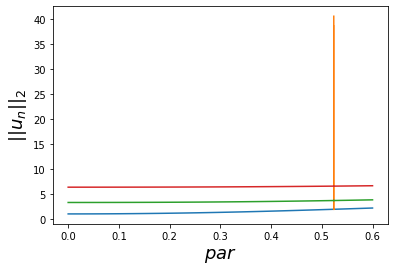

In [105]:
# plot bifurcation diagram
# axs[0].set_xlabel('coupling parameter (d)')
# axs[0].set_ylabel('L2 norm of solution')
# axs[1].set_xlabel('coupling parameter (d)')
# axs[1].set_ylabel('L2 norm of solution')

plt.figure()
fontsize=18
# whole thing
for branch in branches:
    bcolor = 'C'+str( branch["branchnum"] - 1 )
    plt.plot( branch['par'], branch['L2norm'], c=bcolor)
plt.xlabel('$par$',fontsize=fontsize);
plt.ylabel('$||u_n||_2$',fontsize=fontsize);
# plt.xticks([0,0.5,1,1.5],fontsize=fontsize)
# plt.yticks([1.5,2,2.5,3],fontsize=fontsize)

In [112]:
# plot solution along with place on bifurcation diagram
def plotsol(index):
    sol = sols[index]['u']
    center = int(len(sol)/2)
    x = range(0,center)
    y = sol[0:center]

    fontsize=20
    fig = plt.figure()
    plt.plot(x, y, 'o-',linewidth=2, markersize=10)
    plt.xlabel('$n$',fontsize=fontsize)
    plt.ylabel('$u$',fontsize=fontsize)
    plt.tight_layout()

# plot solution along with place on bifurcation diagram
def plotsolBD(index, p):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fontsize=20
    
    # current piece of bifurcation diagram
    par = sols[index]['par'][p]
    branchnum = sols[index]['branchnum']
    bcolor = 'C'+str( branchnum - 1 )
    axs[0].set_xlabel('parameter',fontsize=fontsize)
    axs[0].set_ylabel('L2 norm',fontsize=fontsize)
    axs[0].set_title('p: ' +str(par),fontsize=fontsize)

    # plot current branch
    current_branch = [ branches[i] for i in range(len(branches)) if branches[i]['branchnum'] == branchnum ]
    for branch in current_branch:
        axs[0].plot( branch['par'], branch['L2norm'], c=bcolor )
    axs[0].scatter( sols[index]['par'][p], sols[index]['L2norm'], s=60, c='black' )
    # put main branch on there too
    if branchnum > 0:
        axs[0].plot( branches[0]['par'], branches[0]['L2norm'], c='C0' )
    
    # solution
    sol = sols[index]['u']
    center = int((len(sol)+1)/2)
    x = range(0,center)
    y = sol[0:center]
    
    # first phase always 0
    phase = insert(sol[center:], 0, 0)
    axs[1].plot(x, y, 'o-',linewidth=2, markersize=10)
    axs[1].set_xlabel('$n$',fontsize=fontsize)
    axs[1].set_ylabel('$u$',fontsize=fontsize)
    
    # real part of solution with phase
    w = sols[index]['par'][2]
    t = linspace(0,2*pi/w,100)
    axs[2].plot(t, y[0]*cos(w*t) )
    for index, theta in enumerate(phase):
        axs[2].plot(t, y[index]*cos(w*t + theta) )
    
#     axs[2].plot(xp, phase, 'o-',linewidth=2, markersize=10)
    
    plt.tight_layout()

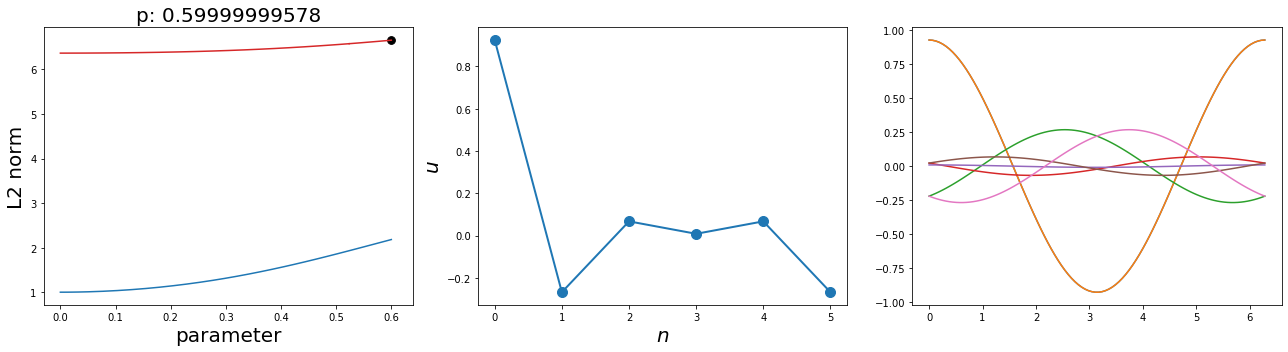

In [113]:
plotsolBD(-3,3)

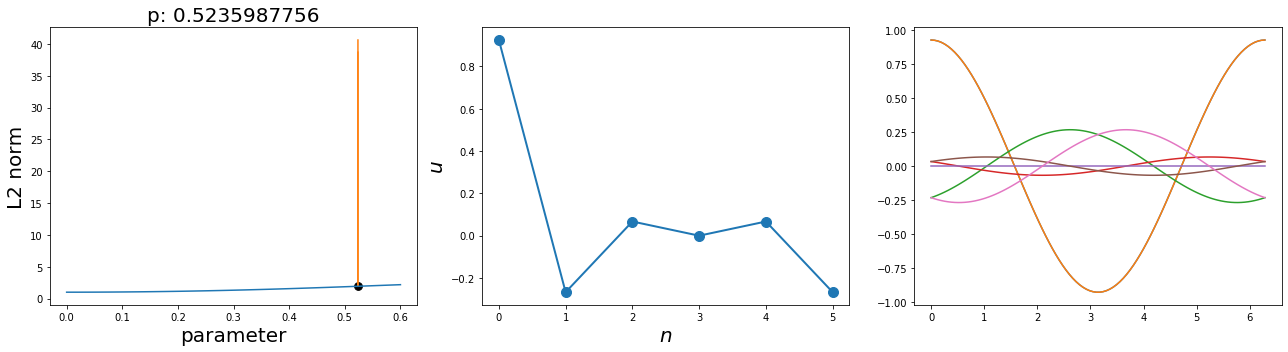

In [129]:
plotsolBD(4,3)

In [81]:
sols[-1]['u']

array([ 0.92402042, -0.27015819,  0.07774189, -0.03892995,  0.07774189,
       -0.27015819,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [136]:
sols[-2]['u']

array([ 0.92413093, -0.26981447,  0.07662263, -0.03668979,  0.07662263,
       -0.26981447,  0.10985791,  0.18327765,  6.28318531, -0.18327765,
       -0.10985791])

In [128]:
6.02326565e-01*2

1.20465313